# Linear Regression with Leave One Out Cross Validation

In leave one out cross validation, the whole dataset is divided into m folds where m is the number of examples in the dataset, where the model is trained on (m-1) folds and validated on the remaining fold. Here, each fold contains only 1 example. In this way, m models are trained and evaluated as every fold among m acts as a validation set. Finally the performance of all the models is compared and the most suitable one is picked. In leave one out cross validation, almost whole dataset is used to train the model and hence the model generalize the data better. However, it is computationally expensive

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [3]:
df = pd.read_csv('datasets/HousingData.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df_cleaned = df.dropna()
df_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [6]:
X = df_cleaned.drop(columns=['MEDV'])
y = df_cleaned['MEDV']

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [9]:
X_main, X_holdout, y_main, y_holdout = train_test_split(X, y, test_size=0.2, random_state=11)
mm  = MinMaxScaler()
X_holdout = mm.fit_transform(X_holdout)
X_main = X_main.to_numpy()
y_main = y_main.to_numpy()
y_holdout = y_holdout.to_numpy()

In [10]:
X_main.shape

(315, 13)

In [11]:
X_holdout.shape

(79, 13)

In [14]:
loo = LeaveOneOut()
fold = 0
best_model = None
best_fold = 0
best_model_mae = float('inf')
for train_idx, test_idx in loo.split(X_main):
    # train_idx and test_idx are the arrays like: [1,2,3,4] which contains indices of the passed array X_main
    fold += 1
    print(f"Fold: {fold}")
    X_train = X_main[train_idx]
    y_train = y_main[train_idx]
    X_val = X_main[test_idx]
    y_val = y_main[test_idx]
    X_train = mm.fit_transform(X_train)
    X_val = mm.fit_transform(X_val)
    model = tf.keras.Sequential([
        tf.keras.Input(shape= (X_train.shape[1],) ),
        tf.keras.layers.Dense(units=1)  # Output layer with 1 neuron (for regression)
])
    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(learning_rate=2.))
    model.fit(X_train,y_train,validation_data=(X_val,y_val), batch_size=10000, epochs=10, verbose=0)
    # Measure this fold's MAE
    error = model.evaluate(X_val, y_val, verbose=0)
    pred = model.predict(X_val, verbose=0) 
    if error < best_model_mae:
        best_model = model
        best_fold = fold
        best_model_mae = error
    print(f"Fold MAE: {error}")

pred_holdout = best_model.predict(X_holdout, verbose=0)
loss_holdout = best_model.evaluate(X_holdout, y_holdout, verbose=0)
# Compute the R^2 score
print('\nBest fold: ', best_fold)
print('Best model params:\n')
print(f'Loss for cross validation set (MAE): {best_model_mae}') 
print(f'Loss for hold out set (MAE): {loss_holdout}') 


Fold: 1
Fold MAE: 12.8171968460083
Fold: 2
Fold MAE: 12.004459381103516
Fold: 3
Fold MAE: 39.248409271240234
Fold: 4
Fold MAE: 17.35350227355957
Fold: 5
Fold MAE: 16.182804107666016
Fold: 6
Fold MAE: 17.188533782958984
Fold: 7
Fold MAE: 10.277070045471191
Fold: 8
Fold MAE: 18.222930908203125
Fold: 9
Fold MAE: 9.729936599731445
Fold: 10
Fold MAE: 14.884714126586914
Fold: 11
Fold MAE: 14.922929763793945
Fold: 12
Fold MAE: 22.019107818603516
Fold: 13
Fold MAE: 13.833758354187012
Fold: 14
Fold MAE: 13.35732364654541
Fold: 15
Fold MAE: 11.12101936340332
Fold: 16
Fold MAE: 6.359236240386963
Fold: 17
Fold MAE: 4.933758735656738
Fold: 18
Fold MAE: 14.64267635345459
Fold: 19
Fold MAE: 5.361146926879883
Fold: 20
Fold MAE: 3.7917189598083496
Fold: 21
Fold MAE: 10.170063972473145
Fold: 22
Fold MAE: 16.00827980041504
Fold: 23
Fold MAE: 31.655414581298828
Fold: 24
Fold MAE: 14.819107055664062
Fold: 25
Fold MAE: 15.104459762573242
Fold: 26
Fold MAE: 1.513376235961914
Fold: 27
Fold MAE: 42.96815109252

#### Plotting Predicted vs Actual Value of Linear Regression Model

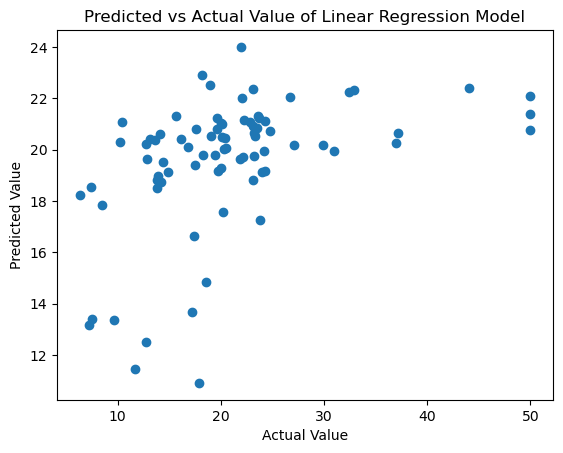

In [15]:
plt.scatter(y_holdout, pred_holdout)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Actual Value of Linear Regression Model')
plt.show()